<h1> Etape 3 : Data Cleaning </h1>

Etape très importante qui vise à analyser chaque colonne du dataset et de les modifier si besoin pour : 
- Ajuster la colonne à prédire <br>
- Corriger le format des colonnes <br>
- Supprimer les colonnes avec trop de valeurs manquantes <br>
- Corriger des valeurs manquantes ou erronées <br>
- Faire du feature modeling

In [1]:
import pandas as pd
chemin_train=r"C:\Users\dell\Documents\Perso\cours_python\16_machine_learning\train.csv"
chemin_test=r"C:\Users\dell\Documents\Perso\cours_python\16_machine_learning\test.csv"
train = pd.read_csv(chemin_train)
test = pd.read_csv(chemin_test)
data = pd.concat([train,test],sort=True)
data.reset_index(inplace=True)
data.head(5)

,index,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,856,854,0,NaN,3,1Fam,TA,No,706.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,3,961,756,0,NaN,3,1Fam,Gd,No,216.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


<h1> Préparation de la donnée </h1>

<b> La valeur à prédire : le prix de la maison </b>

In [2]:
data.columns

Index(['index', '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolA

In [3]:
print(data['SalePrice'].isnull().sum())
print(train['SalePrice'].isnull().sum())

1459
0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   1stFlrSF       2919 non-null   int64  
 2   2ndFlrSF       2919 non-null   int64  
 3   3SsnPorch      2919 non-null   int64  
 4   Alley          198 non-null    object 
 5   BedroomAbvGr   2919 non-null   int64  
 6   BldgType       2919 non-null   object 
 7   BsmtCond       2837 non-null   object 
 8   BsmtExposure   2837 non-null   object 
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtFinType1   2840 non-null   object 
 12  BsmtFinType2   2839 non-null   object 
 13  BsmtFullBath   2917 non-null   float64
 14  BsmtHalfBath   2917 non-null   float64
 15  BsmtQual       2838 non-null   object 
 16  BsmtUnfSF      2918 non-null   float64
 17  CentralAir     2919 non-null   object 
 18  Conditio

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


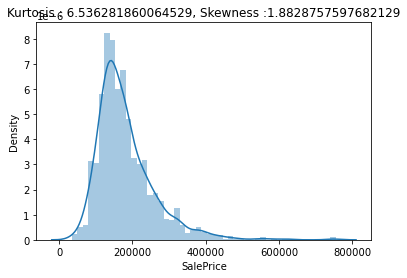

6.536281860064529


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.distplot(train['SalePrice'])
plt.title('Kurtosis : ' +str(train['SalePrice'].kurtosis())+ ', Skewness :' + str(train['SalePrice'].skew()))
plt.show()
print(train['SalePrice'].kurtosis())

<b> Les autres colonnes </b> <br><br>
Ont-elles le bon format ?

In [7]:
data.drop(['SalePrice'],axis=1, inplace=True)

In [8]:
data['1stFlrSF'].head(5)

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

In [9]:
list(data['1stFlrSF'].head(5))

[856, 1262, 920, 961, 1145]

In [10]:
echantillonColonnes = []
for i in data.columns:
    listcolumn = str(list(data[i].head(5)))
    echantillonColonnes.append(listcolumn)
echantillonColonnes[0:5]

['[0, 1, 2, 3, 4]',
 '[856, 1262, 920, 961, 1145]',
 '[854, 0, 866, 756, 1053]',
 '[0, 0, 0, 0, 0]',
 '[nan, nan, nan, nan, nan]']

In [11]:
list(data.dtypes[0:5])

[dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O')]

In [12]:
d = {'colonne': list(data.columns), 'type': list(data.dtypes), 'Echantillon':echantillonColonnes}
colonnesTypes = pd.DataFrame(data=d)

pd.options.display.max_rows = 81
colonnesTypes

,colonne,type,Echantillon
0,index,int64,"[0, 1, 2, 3, 4]"
1,1stFlrSF,int64,"[856, 1262, 920, 961, 1145]"
2,2ndFlrSF,int64,"[854, 0, 866, 756, 1053]"
3,3SsnPorch,int64,"[0, 0, 0, 0, 0]"
4,Alley,object,"[nan, nan, nan, nan, nan]"
5,BedroomAbvGr,int64,"[3, 3, 3, 3, 4]"
6,BldgType,object,"['1Fam', '1Fam', '1Fam', '1Fam', '1Fam']"
7,BsmtCond,object,"['TA', 'TA', 'TA', 'Gd', 'TA']"
8,BsmtExposure,object,"['No', 'Gd', 'Mn', 'No', 'Av']"
9,BsmtFinSF1,float64,"[706.0, 978.0, 486.0, 216.0, 655.0]"


<b> Les autres colonnes comportent-elles des valeurs manquantes </b> <br> <br>
La régression linéaire n'accèpte pas les valeurs manquantes, nous devons donc néttoyé le Data set 

In [13]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na

index             0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.068517
GarageArea        0.034258
GarageCars        0.034258
GarageCond        5.447071
GarageFinish      5.447071
GarageQual        5.447071
G

In [14]:
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : data_na})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071
GarageYrBlt,5.447071


Pas de règle universelle mais si une colonne à plus de 50% de données manquantes il faut la retirer du dataset. Mais si on regarde la définition de PoolQC, MiscFeature, Alley, Fence et FireplaceQu 'Na' veut dire 'Pas de piscine', 'Pas de caractéristique particulière', 'Pas d'allée etc'...c'est donc bien une information ! 

In [15]:
data[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].head(8)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
5,NaN,Shed,NaN,MnPrv,NaN
6,NaN,NaN,NaN,NaN,Gd
7,NaN,Shed,NaN,NaN,TA


In [16]:
data[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']] = data[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].fillna("None")
data[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].head(8)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu
0,None,None,None,None,None
1,None,None,None,None,TA
2,None,None,None,None,TA
3,None,None,None,None,Gd
4,None,None,None,None,TA
5,None,Shed,None,MnPrv,None
6,None,None,None,None,Gd
7,None,Shed,None,None,TA


LotFrontage = ligne de facade, c'est à dire la longueur du terrain commun à la rue.<br>
Première méthode : remplacer une variable numérique manquante par sa médiane (adaptée au data set avec des valeurs abérentes) ou sa moyenne (adapté aux data set sans valeur abérente).

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

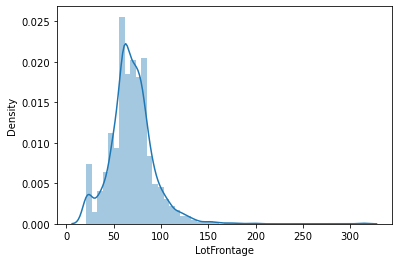

In [17]:
sns.distplot(data['LotFrontage'][data['LotFrontage'].notnull()])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

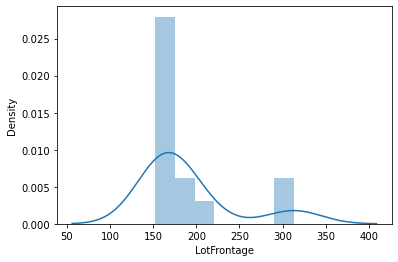

In [18]:
sns.distplot(data['LotFrontage'][data['LotFrontage']>150])

In [19]:
data['LotFrontage'].median()

68.0

In [20]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    68.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Toutes les valeurs manquantes relatives aux garages indiquent en réalité l'absence de garage

In [21]:
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt', 'GarageArea', 'GarageCars']].head(10)

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageArea,GarageCars
0,Attchd,RFn,TA,TA,2003.0,548.0,2.0
1,Attchd,RFn,TA,TA,1976.0,460.0,2.0
2,Attchd,RFn,TA,TA,2001.0,608.0,2.0
3,Detchd,Unf,TA,TA,1998.0,642.0,3.0
4,Attchd,RFn,TA,TA,2000.0,836.0,3.0
5,Attchd,Unf,TA,TA,1993.0,480.0,2.0
6,Attchd,RFn,TA,TA,2004.0,636.0,2.0
7,Attchd,RFn,TA,TA,1973.0,484.0,2.0
8,Detchd,Unf,Fa,TA,1931.0,468.0,2.0
9,Attchd,RFn,Gd,TA,1939.0,205.0,1.0


Pour les valeurs qualitatives nous allons placer 'None' pour toute information manquante. <br>
Pour les valeurs quantitatives nous allons placer '0' pour toute information manquante

In [24]:
data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna("None")
data[['GarageYrBlt', 'GarageArea', 'GarageCars']] = data[['GarageYrBlt', 'GarageArea', 'GarageCars']].fillna(0)

On continue ce travail sur toutes les variables suivantes

In [25]:
data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)
data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna("None")
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data = data.drop(['Utilities'], axis=1)
data["Functional"] = data["Functional"].fillna("Typ")
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['MSSubClass'] = data['MSSubClass'].fillna("None")

Et on vérifie finalement si certaines valeurs sont encore manquantes

In [26]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na

index            0.0
1stFlrSF         0.0
2ndFlrSF         0.0
3SsnPorch        0.0
Alley            0.0
BedroomAbvGr     0.0
BldgType         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
BsmtQual         0.0
BsmtUnfSF        0.0
CentralAir       0.0
Condition1       0.0
Condition2       0.0
Electrical       0.0
EnclosedPorch    0.0
ExterCond        0.0
ExterQual        0.0
Exterior1st      0.0
Exterior2nd      0.0
Fence            0.0
FireplaceQu      0.0
Fireplaces       0.0
Foundation       0.0
FullBath         0.0
Functional       0.0
GarageArea       0.0
GarageCars       0.0
GarageCond       0.0
GarageFinish     0.0
GarageQual       0.0
GarageType       0.0
GarageYrBlt      0.0
GrLivArea        0.0
HalfBath         0.0
Heating          0.0
HeatingQC        0.0
HouseStyle       0.0
Id               0.0
KitchenAbvGr     0.0
KitchenQual      0.0
LandContour  

Aller plus loin :https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca

<b> Est-ce que l'information contenue dans une des colonnes ne peut pas être correlée au prix de la maison ? </b>

In [27]:
data['Id'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [29]:
data.drop(['Id'],axis=1, inplace=True)

KeyError: "['Id'] not found in axis"

<b>Est-ce que certaines informations numériques sont réellement numériques ? <b>

In [30]:
data[['MSSubClass','OverallCond','YrSold','MoSold']].head(5)

,MSSubClass,OverallCond,YrSold,MoSold
0,60,5,2008,2
1,20,8,2007,5
2,60,5,2008,9
3,70,5,2006,2
4,60,5,2008,12


- MSSubClass: The building class <br>
- OverallCond: Overall condition rating <br>
- MoSold: Month Sold <br>
- YrSold: Year Sold <br>

In [31]:
data[['MSSubClass','OverallCond','YrSold','MoSold']] = data[['MSSubClass','OverallCond','YrSold','MoSold']].astype('object')
data[['MSSubClass','OverallCond','YrSold','MoSold']].head(5)

,MSSubClass,OverallCond,YrSold,MoSold
0,60,5,2008,2
1,20,8,2007,5
2,60,5,2008,9
3,70,5,2006,2
4,60,5,2008,12


Est-ce qu'il n'est pas possible ici de faire du feature modeling ?

In [32]:
data[['YearBuilt','YearRemodAdd']].head(5)

,YearBuilt,YearRemodAdd
0,2003,2003
1,1976,1976
2,2001,2002
3,1915,1970
4,2000,2000


In [33]:
import datetime
current_date = datetime.datetime.now().year
current_date

2021

In [34]:
data['years since last remod'] = current_date - data['YearRemodAdd']
data.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace = True)
data['years since last remod'].head(3)

0    18
1    45
2    19
Name: years since last remod, dtype: int64

<b>Préparer ses datasets de test et d'entrainement<b>

In [35]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [36]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [37]:
dataset = data.loc[:1459,:]

In [38]:
pd.options.mode.chained_assignment = None
dataset['SalePrice'] = train['SalePrice']

In [ ]:
dataset.head(3)

In [ ]:
dataset.drop(['index'],axis=1, inplace=True)

In [ ]:
import random
random_indices = random.sample(range(0, len(dataset)),k=len(dataset))
dataset.iloc[random_indices].head(5)

In [ ]:
random.seed(1)
random_indices = random.sample(range(0, len(dataset)),k=len(dataset))
datasetR = dataset.iloc[random_indices]
datasetR.head(5)

In [ ]:
datasetR.reset_index(inplace=True)
datasetR.drop(['index'],axis=1, inplace=True)
datasetR.head(5)

In [ ]:
cut = round(len(datasetR)*0.8)
cut

In [ ]:
dsTrain = datasetR.iloc[0:cut,:]
dsTest = datasetR.iloc[cut:,:]

<b>Créer son premier modèle de prédiction avec une regression univariée</b>

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = datasetR['GrLivArea'], y = datasetR['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression() #quel type de modèle je souhaite utiliser ?

lr.fit(dsTrain[['GrLivArea']],dsTrain['SalePrice']) # entrainement du modèle

prediction = lr.predict(dsTest[['GrLivArea']]) # réaliser la prédiction
prediction[0:5]

In [ ]:
rmse = mean_squared_error(prediction,dsTest['SalePrice'])**(1/2) # calculer l'erreur
rmse

In [ ]:
def linearRegression(datasetR,fit,toPredict):
    
    cut = round(len(datasetR)*0.8)
    dsTrain = datasetR.iloc[0:cut,:].reset_index()
    dsTest = datasetR.iloc[cut:,:]
    
    lr = linear_model.LinearRegression() 
    lr.fit(dsTrain[fit],dsTrain[toPredict])
    prediction = lr.predict(dsTest[fit])
    rmse = mean_squared_error(prediction,dsTest[toPredict])**(1/2)
    return rmse

linearRegression(datasetR,['GrLivArea'],'SalePrice')

<b> Standardisation des valeurs </b>

In [ ]:
datasetR.select_dtypes(include=['int64','float64']).head(3)

In [ ]:
fullListNumbersAndPrice = list(datasetR.select_dtypes(include=['int64','float64']).columns)
#print(fullListNumbersAndPrice)

fullListNumbers = fullListNumbersAndPrice[:-1]
print(fullListNumbers)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
dfStand = scaler.fit_transform(datasetR[fullListNumbers])
dfStand = pd.DataFrame(dfStand, columns=fullListNumbers)
dfStand.head(5)

In [ ]:
def linearRegression(datasetR,fit,toPredict):
    fullListNumbers = list(datasetR.select_dtypes(include=['int64','float64']).columns)
    fullListNumbers = fullListNumbers[:-1]
    
    scaler = preprocessing.StandardScaler()
    dfStand = scaler.fit_transform(datasetR[fullListNumbers])
    dfStand = pd.DataFrame(dfStand, columns=fullListNumbers)
    datasetR[fullListNumbers] = dfStand
    
    cut = round(len(datasetR)*0.8)
    dsTrain = datasetR.iloc[0:cut,:].reset_index()
    dsTest = datasetR.iloc[cut:,:]
    
    lr = linear_model.LinearRegression() 
    lr.fit(dsTrain[fit],dsTrain[toPredict])
    prediction = lr.predict(dsTest[fit])
    rmse = mean_squared_error(prediction,dsTest[toPredict])**(1/2)
    return rmse

linearRegression(datasetR,['GrLivArea'],'SalePrice')

<b> Regression linéaire avec plusieurs colonnes d'entrainement </b>

In [ ]:
datasetR['GarageCars'].head(10)

In [ ]:
fit = ['GrLivArea','GarageCars']
linearRegression(datasetR,fit,'SalePrice')

Youhou ! on a plus qu'à ajouter toutes les colonnes ! 

In [ ]:
results = []
for i in range(len(fullListNumbers)):
    fit = fullListNumbers[0:i+1]
    result = linearRegression(datasetR,fit,'SalePrice')
    results.append(result)

In [ ]:
import numpy as np
print(min(results))
plt.figure(figsize=(12, 8))
sns.lineplot(y=results, x=list(np.arange(0,len(fullListNumbers))))
plt.show()

<b> Faire le tri parmi les features numériques </b> <br>
<p> Ecarter les colonnes avec une corrélation faible avec le prix <p>

In [ ]:
datasetR[fullListNumbersAndPrice].corr().head(5)

In [ ]:
df_corr = datasetR[fullListNumbersAndPrice].corr()
corrSalesprice = df_corr.sort_values('SalePrice',ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=corrSalesprice['SalePrice'], y=corrSalesprice.index)
plt.show()

In [ ]:
df_corr = abs(datasetR[fullListNumbersAndPrice].corr())
corrSalesprice = df_corr.sort_values('SalePrice',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=corrSalesprice['SalePrice'], y=corrSalesprice.index)
plt.show()

0.00-0.19: very weak <br>
0.20-0.39: weak <br>
0.40-0.59: moderate <br>
0.60-0.79: strong <br>
0.80-1.00: very strong.

In [ ]:
less20Percent = list(corrSalesprice[corrSalesprice['SalePrice'] > 0.2].index)
less20Percent.remove('SalePrice')
print(less20Percent)

less40Percent = list(corrSalesprice[corrSalesprice['SalePrice'] > 0.4].index)
less40Percent.remove('SalePrice')
print(less40Percent)

In [ ]:
print(linearRegression(datasetR,fullListNumbers,'SalePrice'))
print(linearRegression(datasetR,less20Percent,'SalePrice')) #Winner ! 
print(linearRegression(datasetR,less40Percent,'SalePrice'))

Supprimer les colonnes trop similaires

In [ ]:
less20Percent.append('SalePrice')
fullListNumbers = less20Percent
df_corr = abs(datasetR[fullListNumbers].corr())   
plt.figure(figsize=(10, 7))
sns.heatmap(df_corr)
plt.show()

On voit que certaines caractéristiques semblent liés : <br>

- Total bsmt SF (Total square feet of basement area) et 1st Flr SF (First Floor square feet)
- Gr Liv Area (Above grade (ground) living area square feet) et TotRms AbvGrd (Total rooms above grade (does not include bathrooms)
- Garage cars (Size of garage in car capacity) et garage Area (Garage Area)

Afin d'éviter d'avoir des informations qui se doublonne et donc ne faire qu'ajouter du bruit l'une à l'autre, nous n'allons conservé que celles ayant le plus fort taux de correlation de chaque couple avec le prix :

- Total bsmt SF
- Gr Liv Area
- GarageArea

In [ ]:
fullListNumbers.remove('1stFlrSF')
fullListNumbers.remove('TotRmsAbvGrd')
fullListNumbers.remove('GarageCars')
#'2ndFlrSF'
print(fullListNumbers)

In [ ]:
fullListNumbers.remove('SalePrice')
linearRegression(datasetR,fullListNumbers,'SalePrice')

<b> Intégration des valeurs catégoricielles </b>

In [ ]:
allcatColumns = list(datasetR.select_dtypes(include=['object']).columns)
print(allcatColumns)

In [ ]:
test = datasetR.groupby(datasetR['Alley']).size().sort_values(ascending=False)
sns.barplot(x=list(test.index), y=list(test.iloc[0:]))
print('Alley' + ' - nombre de catégories : ' + str(len(test)) + ' - Pourcentage de la valeur 1 : ' + str(test[0]/len(datasetR)))

Nous trions mainteant parmis les données catégoricielles. Il faut d'abord retirer celles ne variant pas assez ou ayant trop de valeurs différentes.

In [ ]:
for i in allcatColumns:
    test = datasetR.groupby(datasetR[i]).size().sort_values(ascending=False)
    print(i + ' - nombre de catégories : ' + str(len(test)) + ' - Pourcentage de la valeur 1 : '+ str(test.iloc[0]/len(datasetR)))

Parce qu'une même valeur est rencontrée dans plus de 80% des cas, ou un nombre de catégories trop importantes est constatée nous supprimons ces élements : Alley,BldgType,BsmtCond,BsmtFinType2,CentralAir,Condition1,Condition2,Electrical,ExterCond,Exterior1st,Exterior2nd,Fence,
Functional,GarageCond,GarageQual,Heating,LandContour,LandSlope,MSSubClass,MiscFeature,MoSold,Neighborhood,PavedDrive,PoolQC,
RoofMatl,SaleCondition,SaleType,Street  

In [ ]:
toDelete = ['Alley','BldgType','BsmtCond','BsmtFinType2','CentralAir','Condition1','Condition2','Electrical','ExterCond','Exterior1st','Exterior2nd','Fence','Functional','GarageCond','GarageQual','Heating','LandContour','LandSlope','MSSubClass','MiscFeature','MoSold','Neighborhood','PavedDrive','PoolQC','RoofMatl','SaleCondition','SaleType','Street']  
for i in toDelete:
    allcatColumns.remove(i)

print(allcatColumns)

In [ ]:
def linearRegression(datasetR,fit,toPredict):
    fullListNumbers = list(datasetR.select_dtypes(include=['int64','float64']).columns)
    fullListNumbers = fullListNumbers[:-1]
    
    scaler = preprocessing.StandardScaler()
    dfStand = scaler.fit_transform(datasetR[fullListNumbers])
    dfStand = pd.DataFrame(dfStand, columns=fullListNumbers)
    datasetR[fullListNumbers] = dfStand
    
    allcatColumns = list(datasetR[fit].select_dtypes(include=['object']).columns)
    dummy_cols = pd.DataFrame()
    for col in allcatColumns:
        col_dummies = pd.get_dummies(datasetR[col],prefix=str(col))
        datasetR = pd.concat([datasetR, col_dummies], axis=1)
        del datasetR[col]
        fit = fit + list(col_dummies.columns)
        fit.remove(col)

    cut = round(len(datasetR)*0.8)
    dsTrain = datasetR.iloc[0:cut,:]
    dsTest = datasetR.iloc[cut:,:]
    
    lr = linear_model.LinearRegression() 
    lr.fit(dsTrain[fit],dsTrain[toPredict])
    prediction = lr.predict(dsTest[fit])
    rmse = mean_squared_error(prediction,dsTest[toPredict])**(1/2)
    return rmse

fullcolumnslist =  fullListNumbers + allcatColumns

In [ ]:
fullcolumnslist =  fullListNumbers + allcatColumns

result = linearRegression(datasetR,['OverallQual'],'SalePrice')

newcolumns = ['OverallQual']
for i in range(len(fullcolumnslist)):
    fit = fullcolumnslist[0:i+1]
    test = linearRegression(datasetR,fit,'SalePrice')
    if test < result:
        newcolumns.append(fullcolumnslist[i])
        result = test
        
print(newcolumns)

In [ ]:
linearRegression(datasetR,newcolumns,'SalePrice')

A vous ! Adaptez la fonction pour tester votre modèle sur le jeu de données d'entrainement du concours ! 

In [ ]:
datasetR[fullcolumnslist]